In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("polynomial+regression.csv", sep = ";")

In [7]:
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [8]:
# önce bu modeli linear regression ile görelim

In [9]:
lr = LinearRegression()

In [10]:
X = df.araba_fiyat.values.reshape(-1,1)
y = df.araba_max_hiz.values.reshape(-1,1)
lr.fit(X,y)

LinearRegression()

In [13]:
y_head = lr.predict(X)
y_head

array([[240.10817425],
       [240.7435423 ],
       [241.37891035],
       [242.64964646],
       [243.92038256],
       [245.82648672],
       [249.00332698],
       [252.18016724],
       [255.3570075 ],
       [261.71068803],
       [268.06436855],
       [283.94856986],
       [299.83277117],
       [363.3695764 ],
       [426.90638163]])

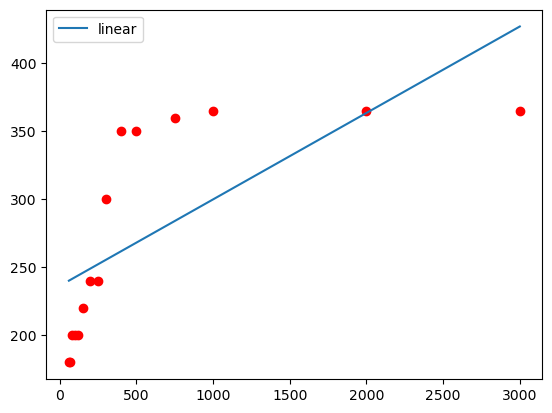

In [15]:
plt.scatter(X,y,color="red")
plt.plot(X,y_head,label= "linear")
plt.legend()
plt.show()

In [16]:
# Görüldüğü gibi bu dataya linear regression yaptığımızda çok fazla hata oranı oluyor.
# şimdi polynomial regression ıyguladığımızda hata oranı(MSE) sıfıra yakın çıkacak.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
polynomial_reg = PolynomialFeatures(degree = 2)  # y = b0 + b1*x^1 + b2*x^2    degree burada x^2'de durmamızı söylüyor

In [26]:
X_polynomial = polynomial_reg.fit_transform(X) #X'i al 2. dereceden polinoma çevir

In [27]:
X_polynomial #1. sütün x^0, 2. sütun x^1 ve 3. sütun x^2

array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.000e+01, 4.900e+03],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 3.000e+03, 9.000e+06]])

In [28]:
# daha sonra bu X_polynomialı linear regressiona fit etmemiz lazım

In [30]:
lr2 = LinearRegression()
lr2.fit(X_polynomial,y)

LinearRegression()

In [31]:
y_head2 = lr2.predict(X_polynomial)

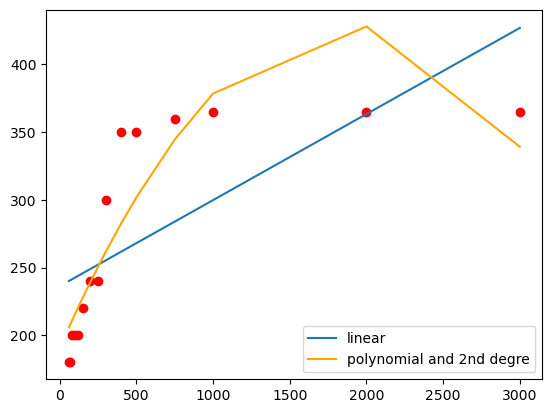

In [33]:
plt.scatter(X,y,color="red")
plt.plot(X,y_head,label= "linear")
plt.plot(X, y_head2, color = "orange", label = "polynomial and 2nd degre")
plt.legend()
plt.show()

In [34]:
# Eğer polinom derecesini arttırırsak hata oranı daha da düşer

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
polynomial_reg2 = PolynomialFeatures(degree = 4)

In [39]:
X_polynomial2 = polynomial_reg2.fit_transform(X)

In [40]:
lr3 = LinearRegression()
lr3.fit(X_polynomial2,y)

LinearRegression()

In [41]:
y_head3 = lr3.predict(X_polynomial2)

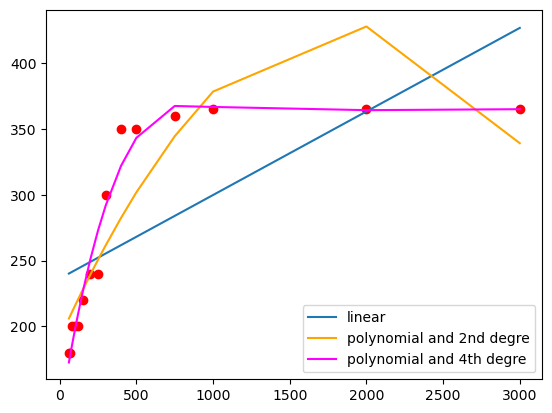

In [42]:
plt.scatter(X,y,color="red")
plt.plot(X,y_head,label= "linear")
plt.plot(X, y_head2, color = "orange", label = "polynomial and 2nd degre")
plt.plot(X, y_head3, color = "magenta", label = "polynomial and 4th degre")
plt.legend()
plt.show()